In [300]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from IPython.display import HTML


sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [319]:
empdata = pd.read_csv("emp_data.csv")
empsurv = pd.read_csv("emp_office_survey.csv")

<b> Data Cleansing </b>

In [313]:
empdata.drop('EmployeeCount', axis='columns', inplace=True)
empdata.drop('StandardHours', axis='columns', inplace=True)

In [337]:
empdata['EmployeeID'] = empdata['EmployeeID'].astype(str)
empdata['EmployeeNumber'] = empdata['EmployeeNumber'].astype(str)
empdata['record_num'] = empdata.index+1
empdata = empdata.set_index("record_num")
empdata['Attrition'] = empdata['Attrition'].replace({'Yes':'Left', 'No':'Stayed'})
empdata.loc[empdata['Reason'] == 'reallocation out of the area', 'Reason'] = 'relocation out of the area'

In [308]:
empdata['EnvironmentSatisfaction'] = empdata['EnvironmentSatisfaction'].astype(str)
empdata['JobInvolvement'] = empdata['JobInvolvement'].astype(str)
empdata['JobSatisfaction'] = empdata['JobSatisfaction'].astype(str)
empdata['PerformanceRating'] = empdata['PerformanceRating'].astype(str)
empdata['RelationshipSatisfaction'] = empdata['RelationshipSatisfaction'].astype(str)
empdata['WorkLifeBalance'] = empdata['WorkLifeBalance'].astype(str)

In [323]:
empdata.head(5)

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,14,4,5,3,Yes,2019.0,long hours,Voluntary,BOS,L7
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,...,12,4,5,3,Yes,2018.0,medical issues,Voluntary,NYC,L6
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,1,1572,...,12,3,1,4,Yes,2018.0,retiring,Voluntary,OTT,L6
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,1,309,...,13,4,5,3,Yes,2019.0,career change,Voluntary,NYC,L7
4,100004,2007,57,Travel_Rarely,285,Marketing,2,Diploma,1,828,...,11,5,5,3,Yes,2018.0,retiring,Voluntary,CAL,L5


In [102]:
empdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13423 entries, 1 to 13423
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13423 non-null  object 
 1   JoiningYear               13423 non-null  int64  
 2   Age                       13423 non-null  int64  
 3   BusinessTravel            13423 non-null  object 
 4   DailyRate                 13423 non-null  int64  
 5   Department                13423 non-null  object 
 6   DistanceFromHome          13423 non-null  int64  
 7   EducationField            13423 non-null  object 
 8   EmployeeNumber            13423 non-null  object 
 9   EnvironmentSatisfaction   13423 non-null  int64  
 10  Gender                    13423 non-null  object 
 11  HourlyRate                13423 non-null  int64  
 12  JobInvolvement            13423 non-null  int64  
 13  JobSatisfaction           13423 non-null  int64  
 14  MaritalStat

In [104]:
empdata.describe()

,JoiningYear,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,LeavingYear
count,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.00000,13423.000000,13423.000000,13423.000000,...,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,3198.000000
mean,2018.825300,36.159949,803.998287,8.881472,2.369366,65.498622,2.46316,2.388214,6338.864486,14281.290695,...,2.367504,0.500410,10.572227,2.454518,2.496908,2.791626,1.898979,1.396037,1.873501,2020.392120
std,2.005345,8.126696,356.968483,6.844715,0.941861,17.196420,0.66039,0.956279,4638.789110,7116.133478,...,0.930938,0.664563,7.246988,1.069622,0.656888,1.860029,1.039347,0.818350,1.004282,1.420644
min,2005.000000,18.000000,102.000000,1.000000,1.000000,30.000000,1.00000,1.000000,1009.000000,2094.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000
25%,2018.000000,30.000000,514.500000,3.000000,2.000000,52.000000,2.00000,2.000000,2776.500000,8127.500000,...,2.000000,0.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2019.000000
50%,2019.000000,35.000000,800.000000,7.000000,2.000000,65.000000,3.00000,2.000000,4790.000000,14273.000000,...,2.000000,0.000000,9.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2021.000000
75%,2020.000000,41.000000,1106.000000,13.000000,3.000000,79.000000,3.00000,3.000000,8147.000000,20475.000000,...,3.000000,1.000000,14.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2022.000000
max,2021.000000,60.000000,1499.000000,29.000000,4.000000,100.000000,4.00000,4.000000,19999.000000,26999.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,15.000000,7.000000,6.000000,6.000000,2022.000000


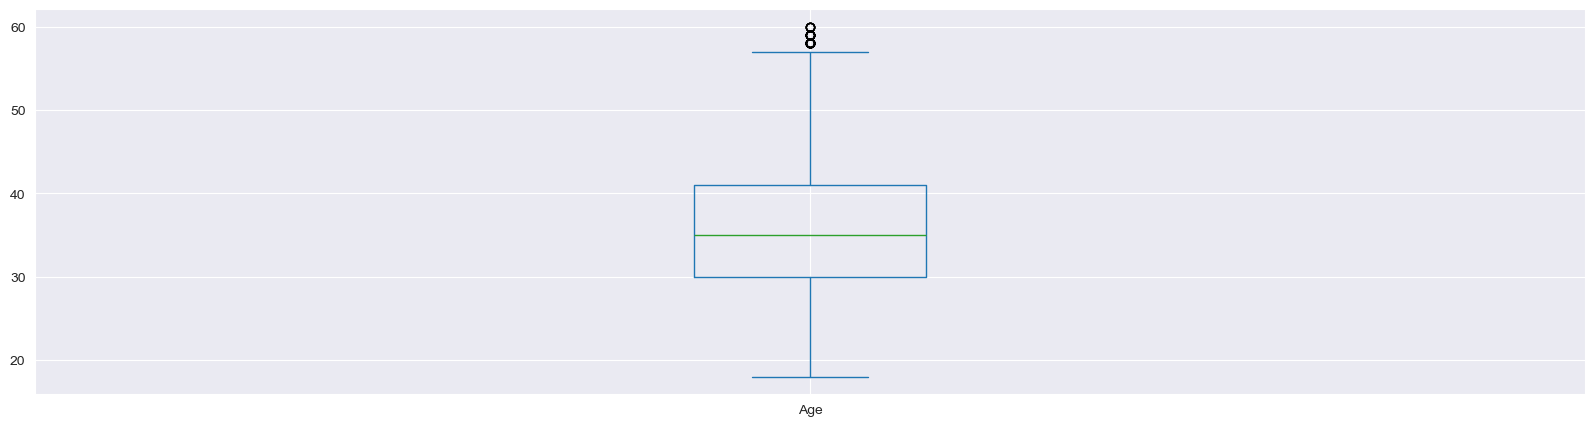

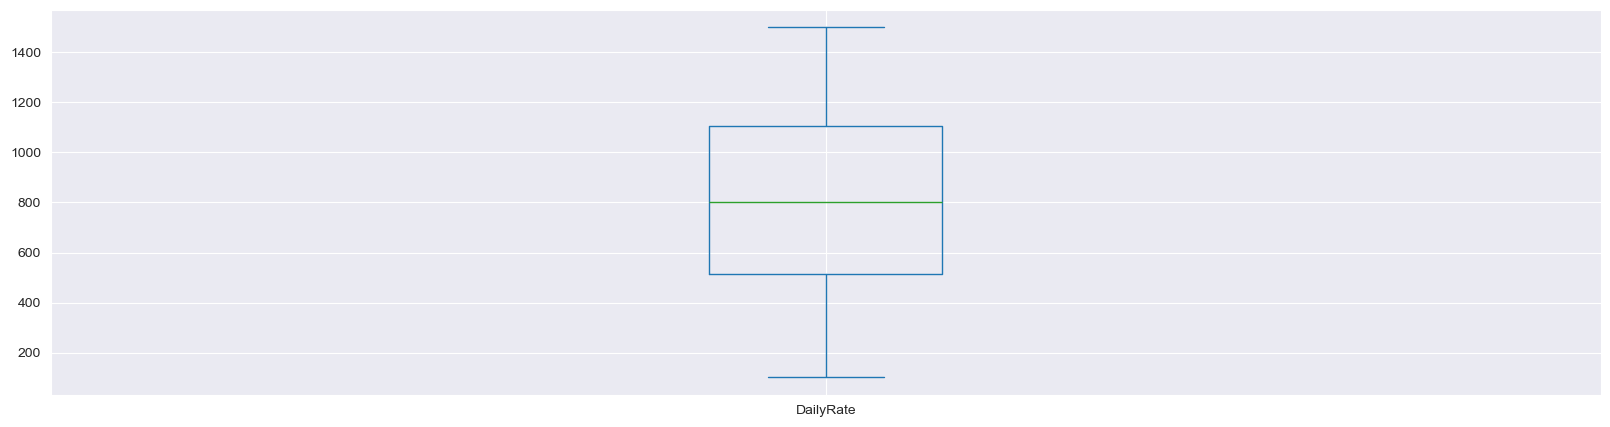

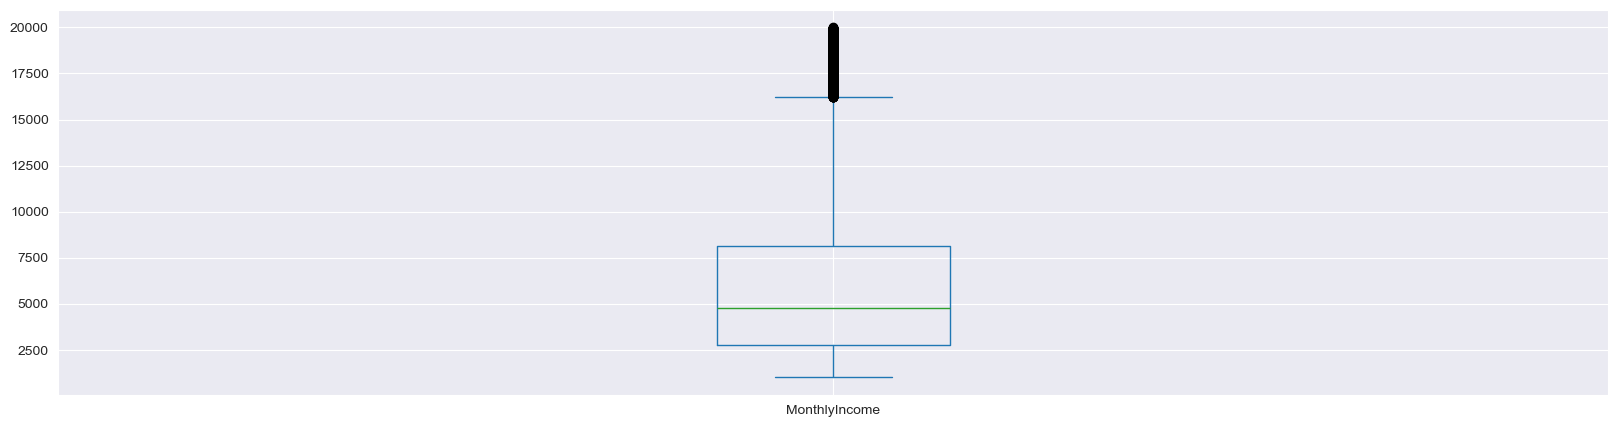

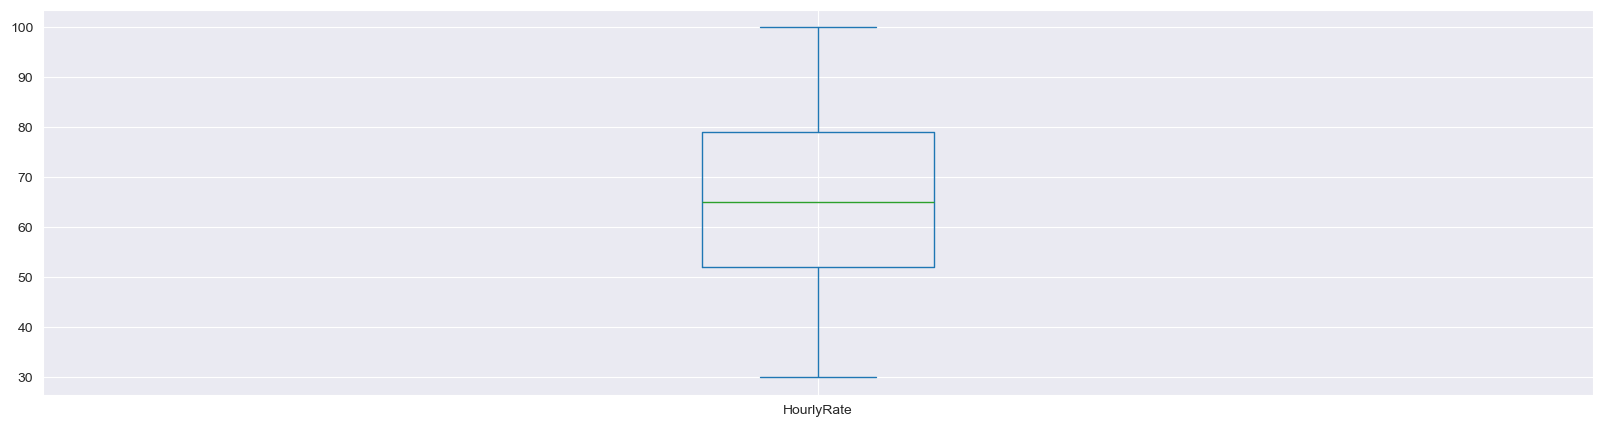

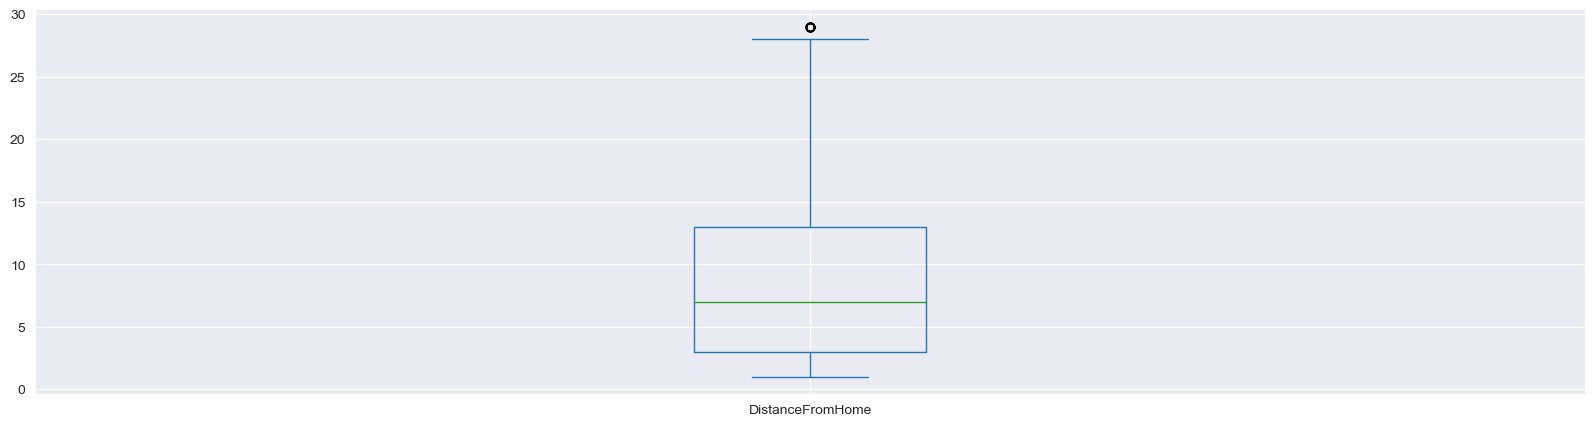

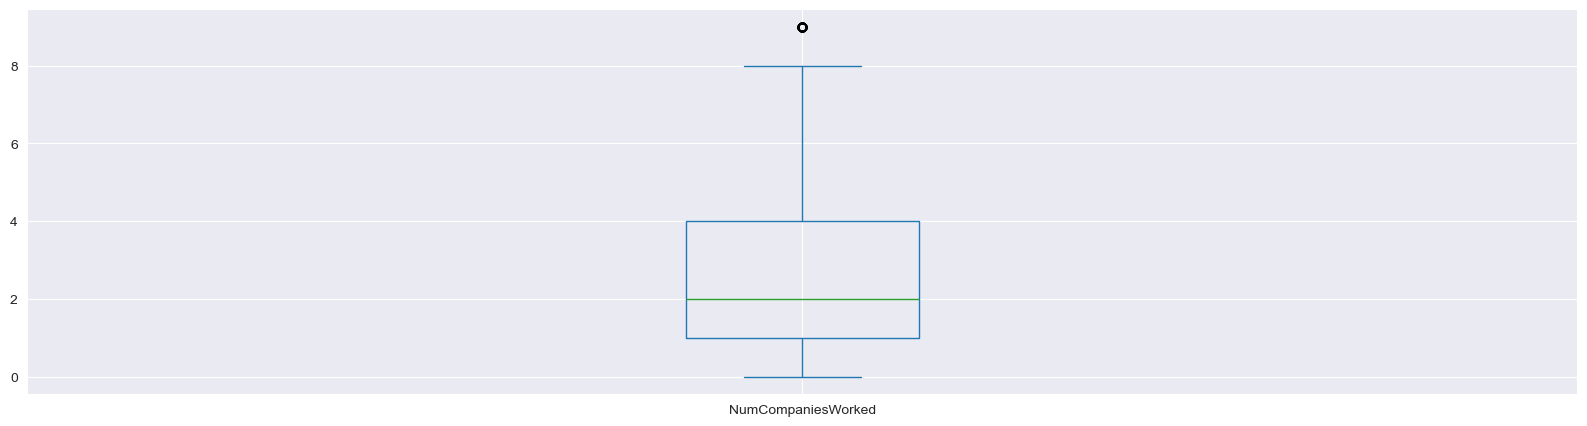

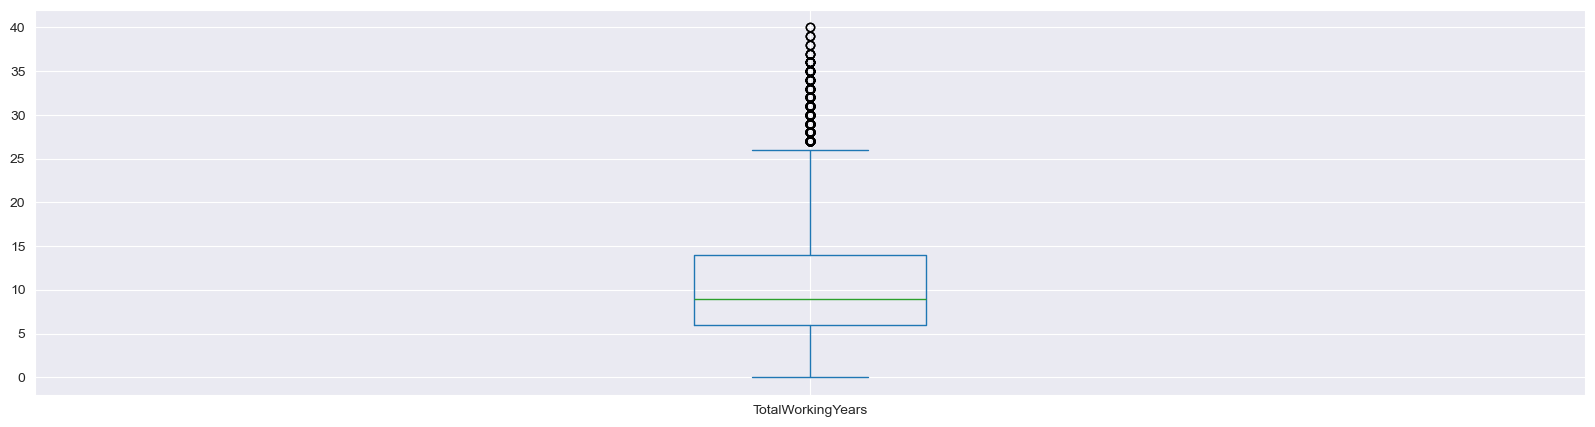

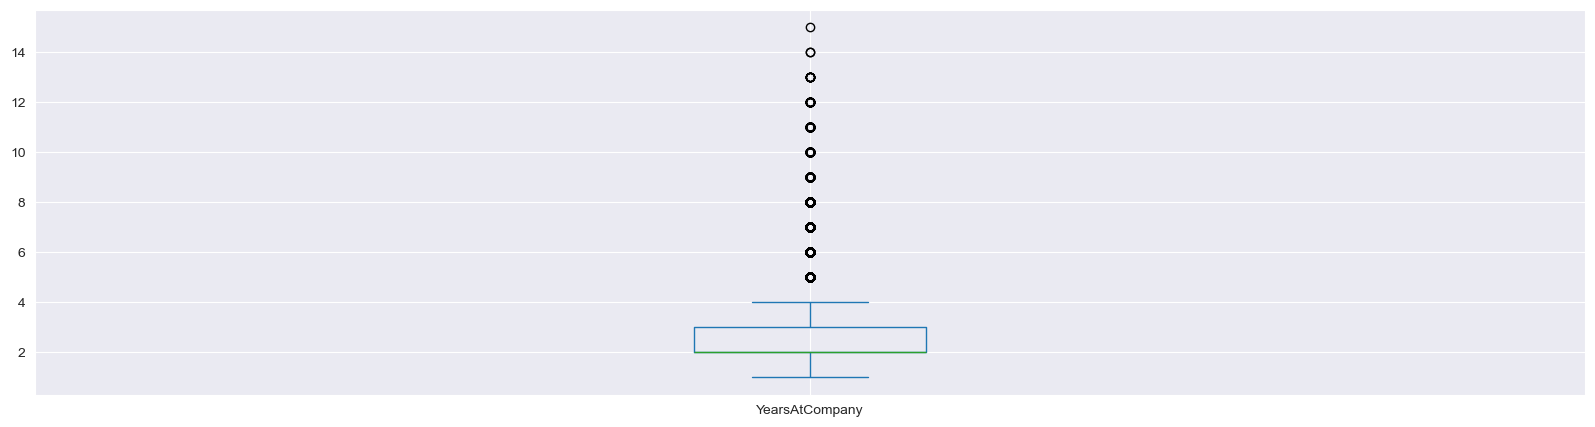

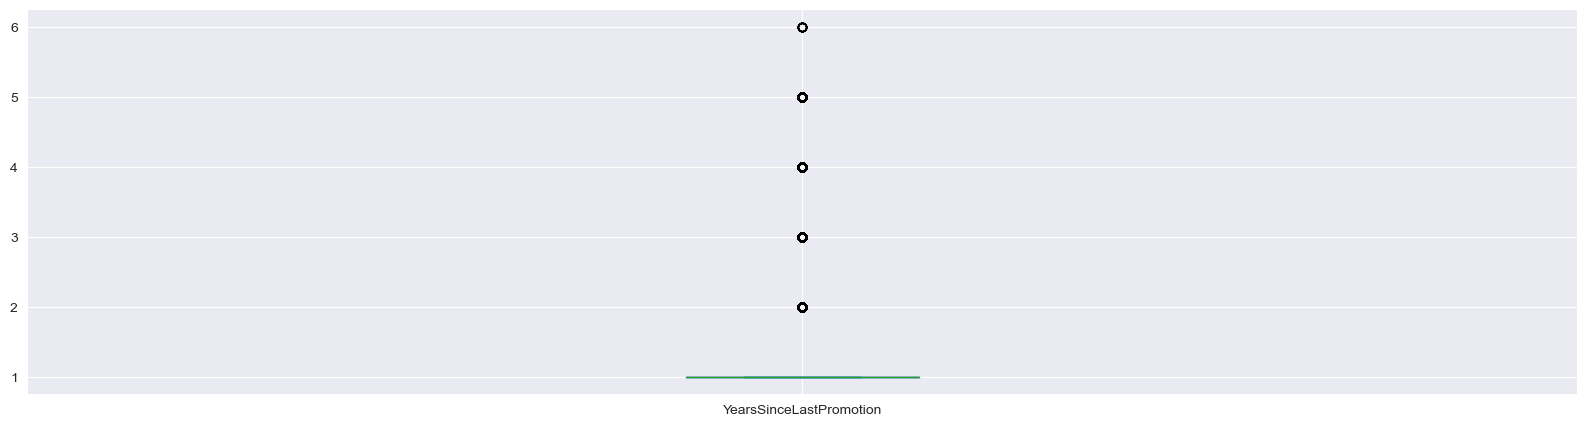

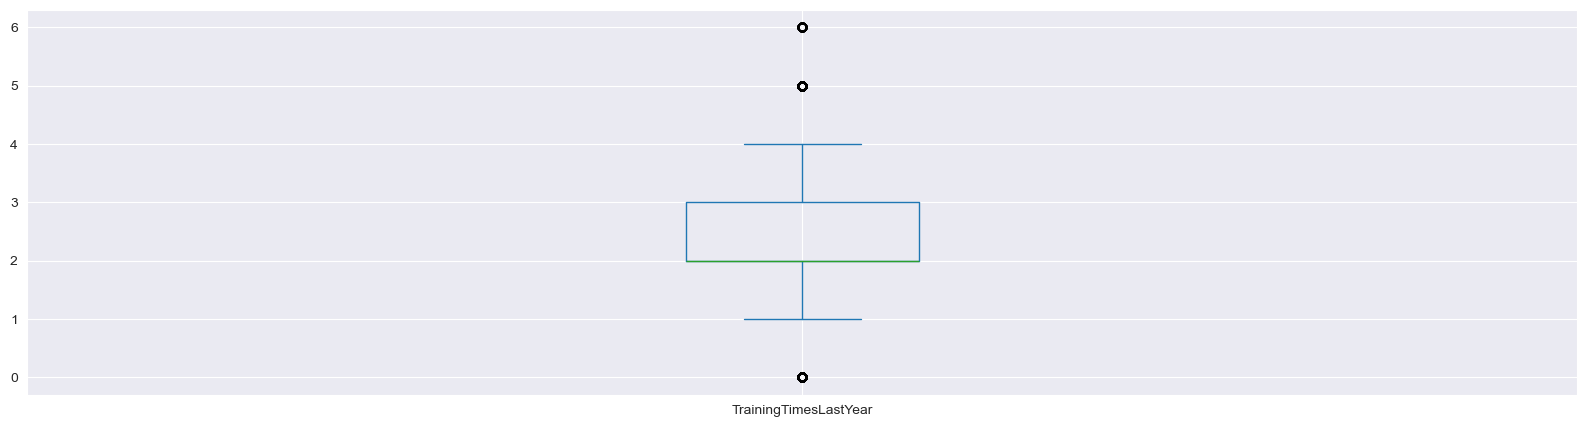

In [106]:
empdata['Age'].plot(kind='box')
plt.show()
empdata['DailyRate'].plot(kind='box')
plt.show()
empdata['MonthlyIncome'].plot(kind='box')
plt.show()
empdata['HourlyRate'].plot(kind='box')
plt.show()
empdata['DistanceFromHome'].plot(kind='box')
plt.show()
empdata['NumCompaniesWorked'].plot(kind='box')
plt.show()
empdata['TotalWorkingYears'].plot(kind='box')
plt.show()
empdata['YearsAtCompany'].plot(kind='box')
plt.show()
empdata['YearsSinceLastPromotion'].plot(kind='box')
plt.show()
empdata['TrainingTimesLastYear'].plot(kind='box')
plt.show()


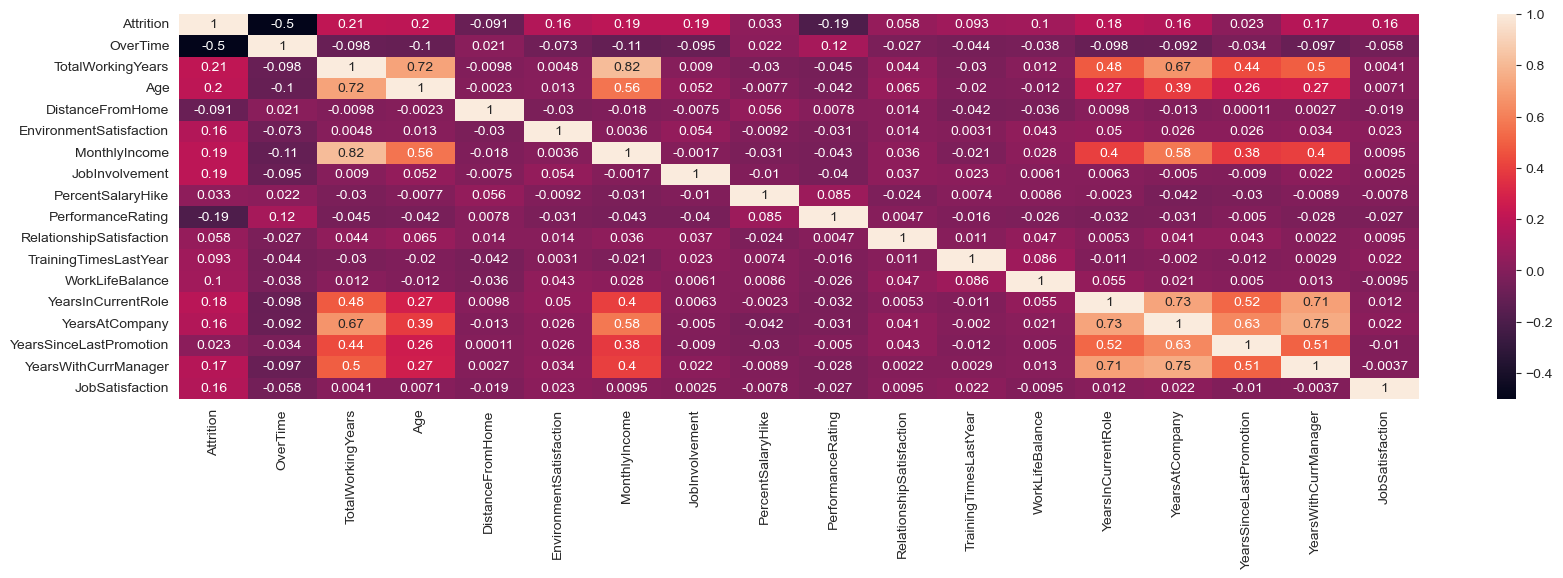

In [362]:
empdata['Attrition'] = empdata['Attrition'].replace({'Stayed':'1', 'Left':'0'})
empdata['OverTime'] = empdata['OverTime'].replace({'Yes':'1', 'No':'0'})
empdata['Attrition'] = empdata['Attrition'].astype(int)
empdata['OverTime'] = empdata['OverTime'].astype(int)
columns = ['Attrition', 'OverTime', 'TotalWorkingYears', 'Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'MonthlyIncome', 'JobInvolvement', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobSatisfaction']
empdata_corr = empdata[columns].corr(method='pearson', numeric_only=True)
sns.heatmap(empdata_corr, annot=True)
plt.savefig('heatmap.png', format='png', bbox_inches='tight', pad_inches=0.1)

<b>*Years since last promotion and salary increases seem to be the least correlated with attrition. Our best bet is to look into overtime as a reason for leaving, as that is most closely correlated with attrition. Besides that, we can look into total total working years, age, income, job involvement, performance rating, environment satisfaction, job satisfaction, work-life balance, and years in current role, at the company, and with their current manager.

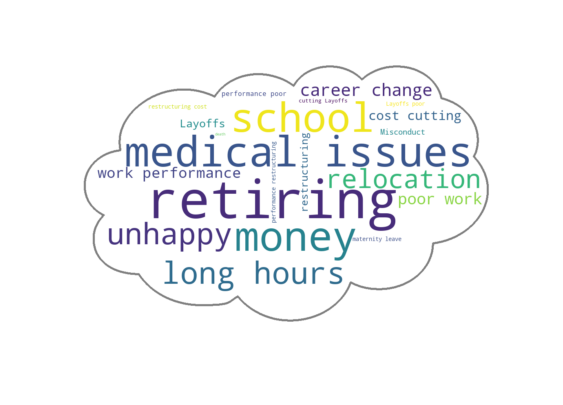

In [369]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import re

# Define custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["return", "offered", "area"])

#Filter out nulls
nonulls = empdata['Reason'].dropna()

# Sample text for the word cloud
text = ' '.join(nonulls.astype(str))

# Load the mask image
mask = np.array(Image.open('cloud.png'))

# Create a WordCloud object
wordcloud = WordCloud(width=1600, height=1200, background_color='white', mask=mask, stopwords=custom_stopwords, contour_color='gray', contour_width=6).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()

<b> * Retirement is our number one reason for employees leaving, followed by medical issues. While these two can be difficult to change, the rest of the reasons are entirely doable.

<B>Employee Salaries</b>

Raises

Text(0.5, 1.0, 'Attrition by Salary Hike')

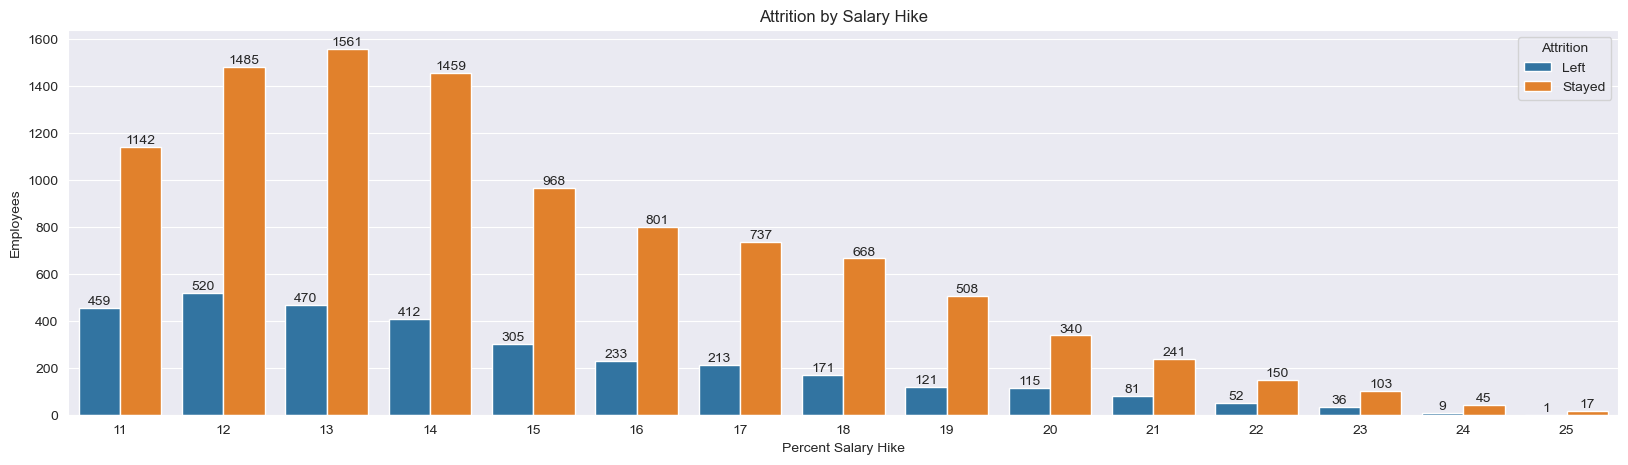

In [371]:
# Draw a nested barplot by species and sex
cat_order = ["0", "1", "2", "3", "4"]
g = sns.countplot(
    data=empdata,
    x="PercentSalaryHike", hue="Attrition"
)
for i in g.containers:
    g.bar_label(i,)

# Set custom legend labels
legend_labels = ['Left', 'Stayed']  # Customize these labels as needed
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles, labels=legend_labels, title='Attrition')

plt.xlabel('Percent Salary Hike')
plt.ylabel('Employees')
plt.title('Attrition by Salary Hike')


<b>*Raises do not appear to have an impact on employee attrition.

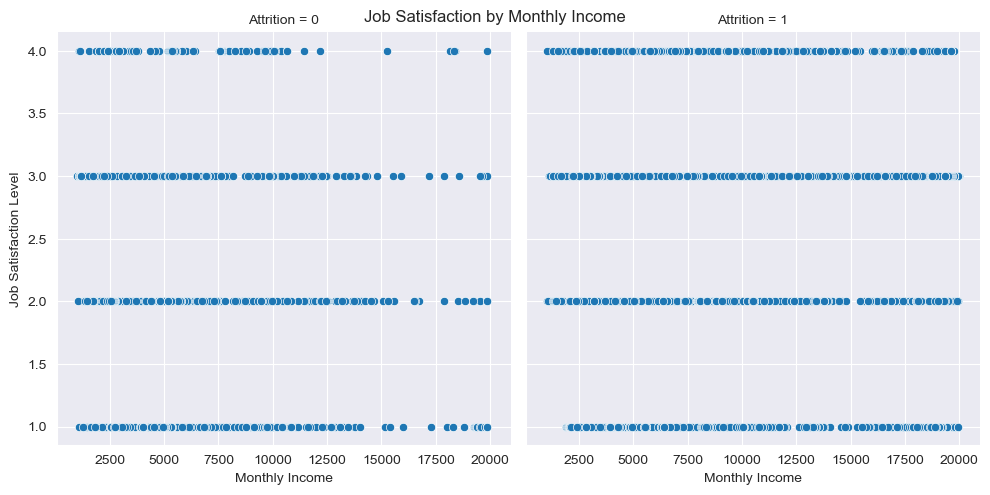

<Figure size 2000x500 with 0 Axes>

In [230]:
order = ["Low", "Medium", "High", "Very High"]
g = sns.relplot(x="MonthlyIncome",
                y="JobSatisfaction",
                data = empdata,
           kind="scatter",
           col="Attrition")

g.set_axis_labels("Monthly Income", "Job Satisfaction Level")
g.fig.suptitle("Job Satisfaction by Monthly Income")
plt.show()

<b>*Higher income and higher job satisfaction lead to a larger amount of employees staying with the company.

Promotions

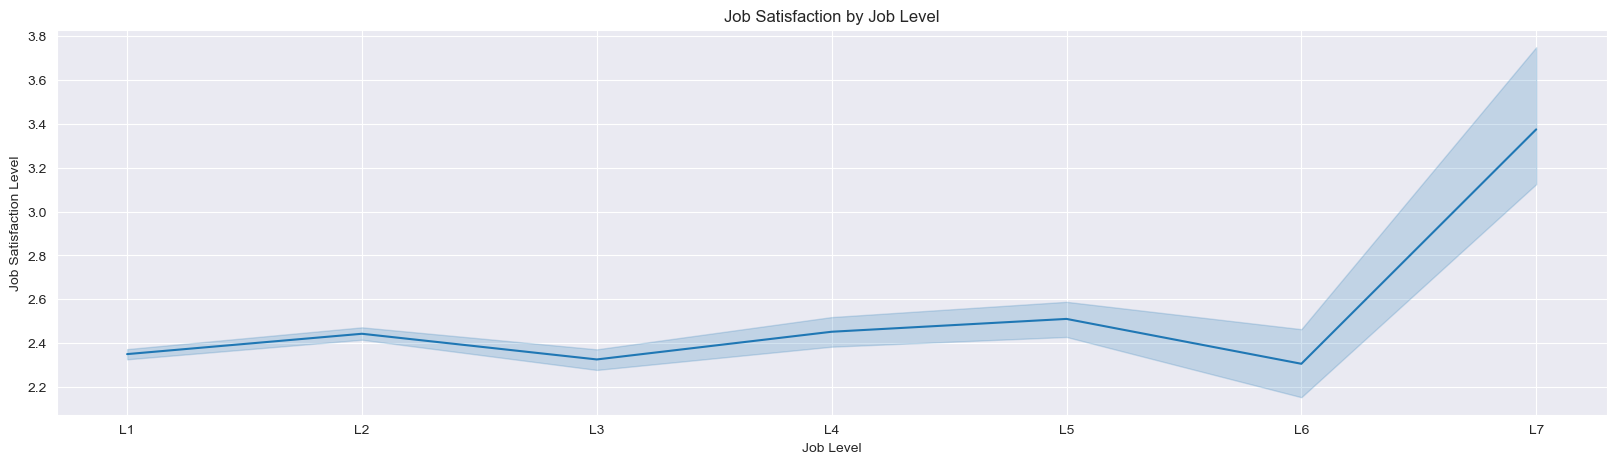

<Figure size 2000x500 with 0 Axes>

In [232]:
empdata['joblvl'] = pd.Categorical(empdata['JobLevel_updated'],
                                   categories=["L1", "L2", "L3", "L4", "L5", "L6", "L7"],
                                   ordered=True)
# Create the line plot
sns.lineplot(x="joblvl",
                y="JobSatisfaction",
                data = empdata)

plt.xlabel('Job Level')
plt.ylabel('Job Satisfaction Level')
plt.title('Job Satisfaction by Job Level')
    
plt.show()

<b>*As employees are promoted, they tend to be happier in their position, leading to higher job satisfaction.

<b>Employee Satisfaction</b>

Work-Life Balance

<i>Remote Options</i>

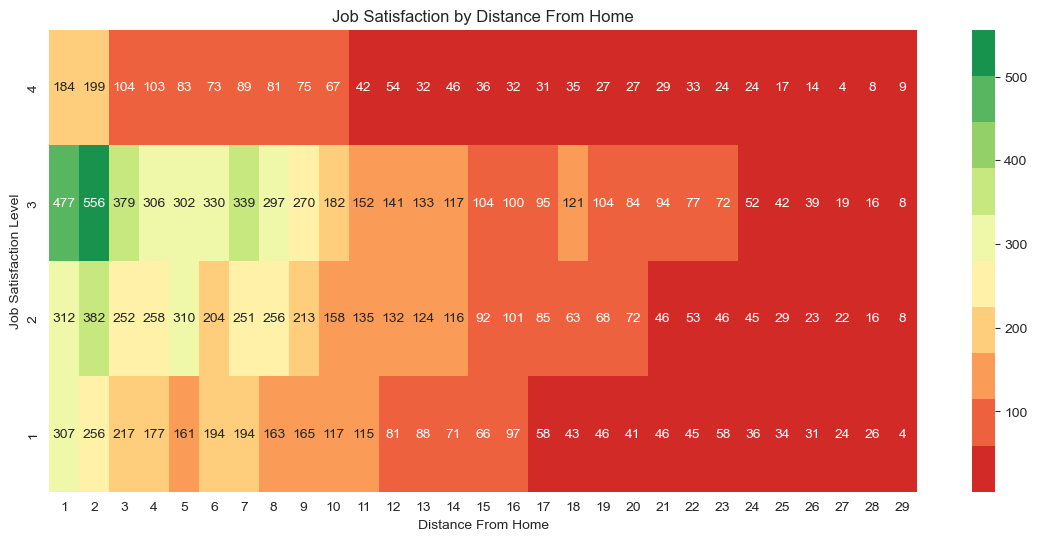

<Figure size 2000x500 with 0 Axes>

In [234]:
select_ot = empdata[['JobSatisfaction', 'DistanceFromHome']]
pivot = select_ot.pivot_table(index='JobSatisfaction', columns='DistanceFromHome', aggfunc=len, fill_value=0)
cm = sns.color_palette("RdYlGn", 10)
plt.figure(figsize=(14, 6))
remoteopt = sns.heatmap(pivot, cmap=cm, annot=True, fmt='d')
plt.gca().invert_yaxis()
plt.xlabel('Distance From Home')
plt.ylabel('Job Satisfaction Level')
plt.title('Job Satisfaction by Distance From Home')
plt.show()

<b>*Employees that live closer tend to have higher job satisfaction. While employees that live further from the company are more rare, they tend to be more unhappy. A good way to combat this is to introduce remote options for those living a further distance away.

<i>Overtime</i>

In [238]:
empdata['Attrition'] = empdata['Attrition'].astype(str)
empdata['OverTime'] = empdata['OverTime'].astype(str)
empdata['Attrition'] = empdata['Attrition'].replace({'1':'Stayed', '0':'Left'})
empdata['OverTime'] = empdata['OverTime'].replace({'1':'Yes', '0':'No'})

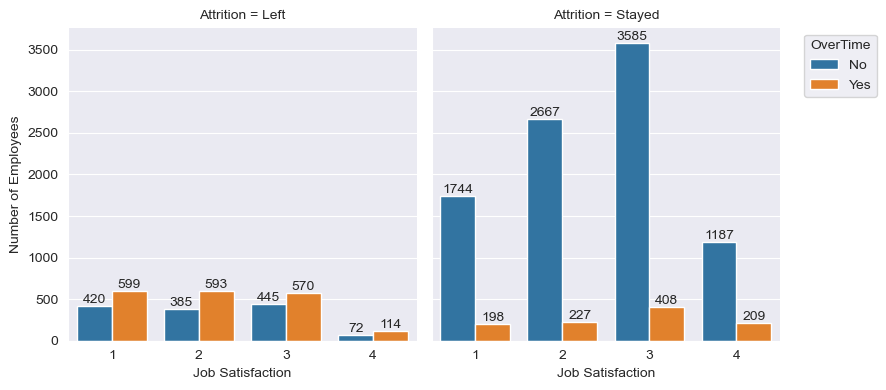

In [240]:
# Draw a nested barplot by species and sex
cat_order = [ "1", "2", "3", "4"]
custom_palette = {"Yes" : "orange", "No" : "blue"}
g = sns.FacetGrid(empdata, col='Attrition', col_wrap=2, height=4)
g.map_dataframe(sns.countplot, x="JobSatisfaction", hue="OverTime", order=cat_order, palette='tab10')

# Add labels to the bars
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')
        ax.set_xlabel('Job Satisfaction')
        ax.set_ylabel('Number of Employees')

# Customize the legend
for ax in g.axes.flat:
    ax.legend(title='OverTime', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position


<b>*Employees that do not work overtime tend to have higher job satisfaction, leading to better employee retention.

Leadership Opportunities

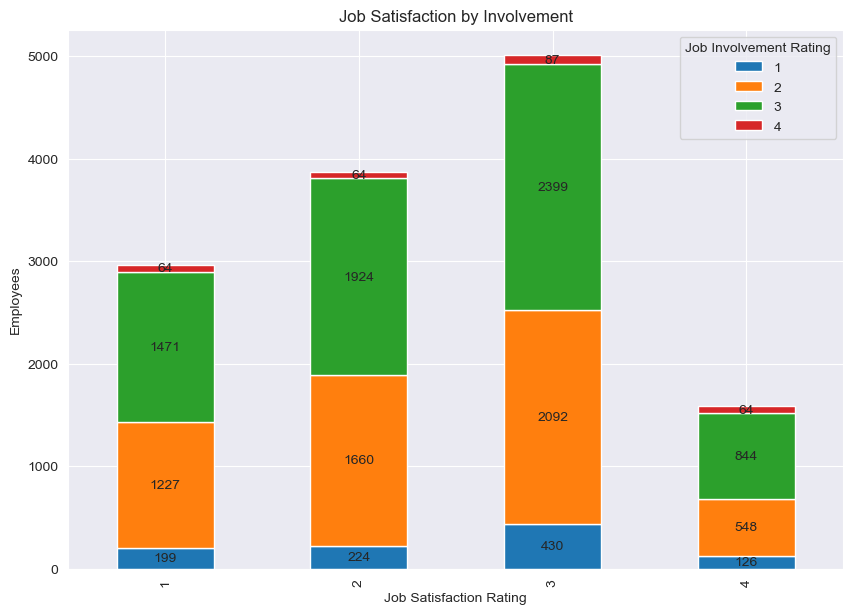

<Figure size 2000x500 with 0 Axes>

In [244]:
# Sample data for demonstration
df_pivot = empdata.pivot_table(index='JobSatisfaction', columns='JobInvolvement', aggfunc='size', fill_value=0)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot each subcategory as stacked bars
bars = df_pivot.plot(kind='bar', stacked=True, ax=ax)

# Add data labels
for container in bars.containers:
    ax.bar_label(container, label_type='center')

# Add labels and title
plt.xlabel('Job Satisfaction Rating')
plt.ylabel('Employees')
plt.title('Job Satisfaction by Involvement')
plt.legend(title='Job Involvement Rating')

# Show the plot
plt.show()

<b> * Employees do enjoy the extra responsibility that comes with leadership. Take the second and third levels of job involvement across all columns for example. However, too much responsibility does lead to burnout and decreased happiness in the workplace.

In [78]:
empdata['AvgJobSatisfaction'] = empdata['JobSatisfaction'].mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3728\3174858920.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



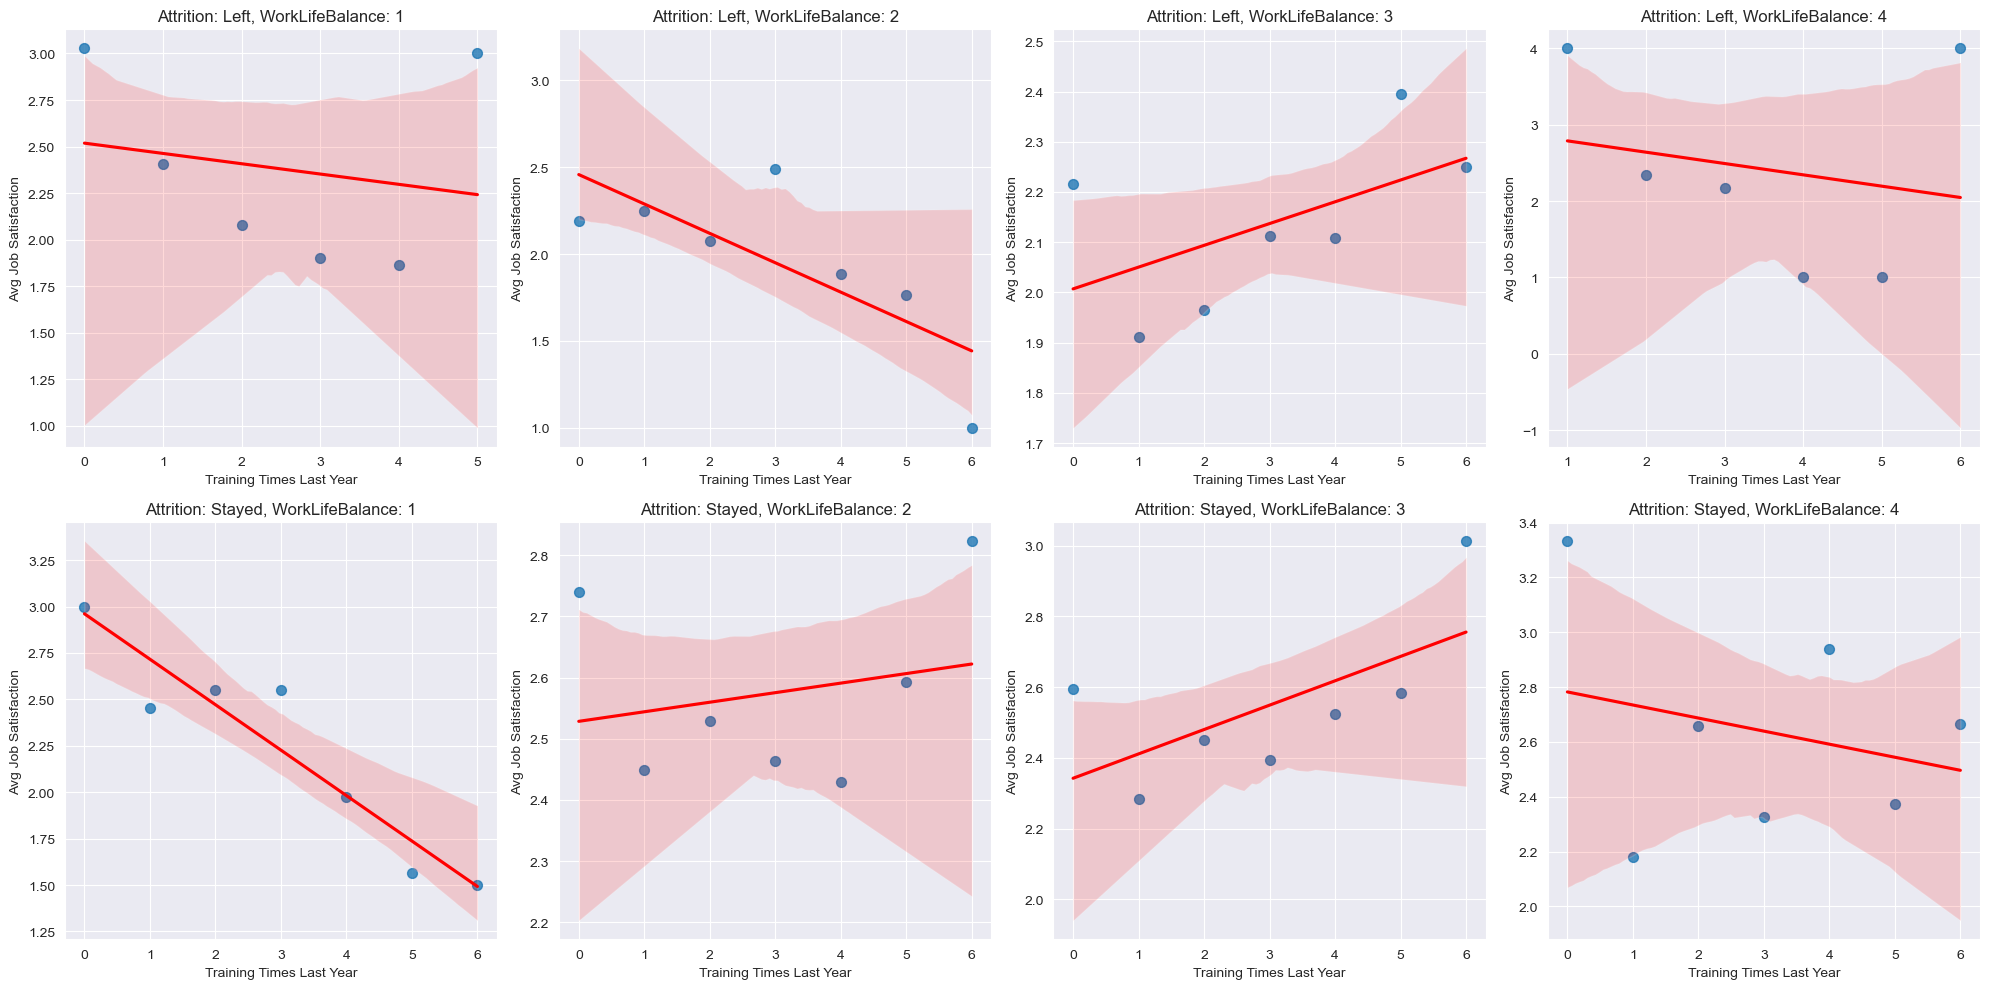

<Figure size 2000x500 with 0 Axes>

In [246]:
# Set the order of WorkLifeBalance categories
empdata['WorkLifeBalance'] = pd.Categorical(empdata['WorkLifeBalance'], categories=[1, 2, 3, 4], ordered=True)

# Calculate the average JobSatisfaction by Attrition, WorkLifeBalance, and TrainingTimesLastYear
avg_js = empdata.groupby(['Attrition', 'WorkLifeBalance', 'TrainingTimesLastYear'])['JobSatisfaction'].mean().reset_index()

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

# Unique values for filtering
attrition_values = empdata['Attrition'].unique()
work_life_balance_values = empdata['WorkLifeBalance'].cat.categories  # Now ordered

# Loop through each combination of Attrition and WorkLifeBalance to create scatter plots
for i, (attrition, work_life_balance) in enumerate([(a, w) for a in attrition_values for w in work_life_balance_values]):
    filtered_data = avg_js[(avg_js['Attrition'] == attrition) & (avg_js['WorkLifeBalance'] == work_life_balance)]
    
    sns.regplot(x='TrainingTimesLastYear', y='JobSatisfaction', data=filtered_data, ax=axs[i], scatter_kws={'s': 50}, line_kws={"color": "red"})
    axs[i].set_title(f'Attrition: {attrition}, WorkLifeBalance: {work_life_balance}')
    axs[i].set_xlabel('Training Times Last Year')
    axs[i].set_ylabel('Avg Job Satisfaction')

# Adjust layout
plt.tight_layout()
plt.show()

<b> * Generally, the lower an employee's work life balance is, the more frustrated they will be with extra work. We need to ensure that those taking part in extra training are not already overloaded with work, otherwise this will lead to unnecessary stress and a loss of employees.

Employee Recognition

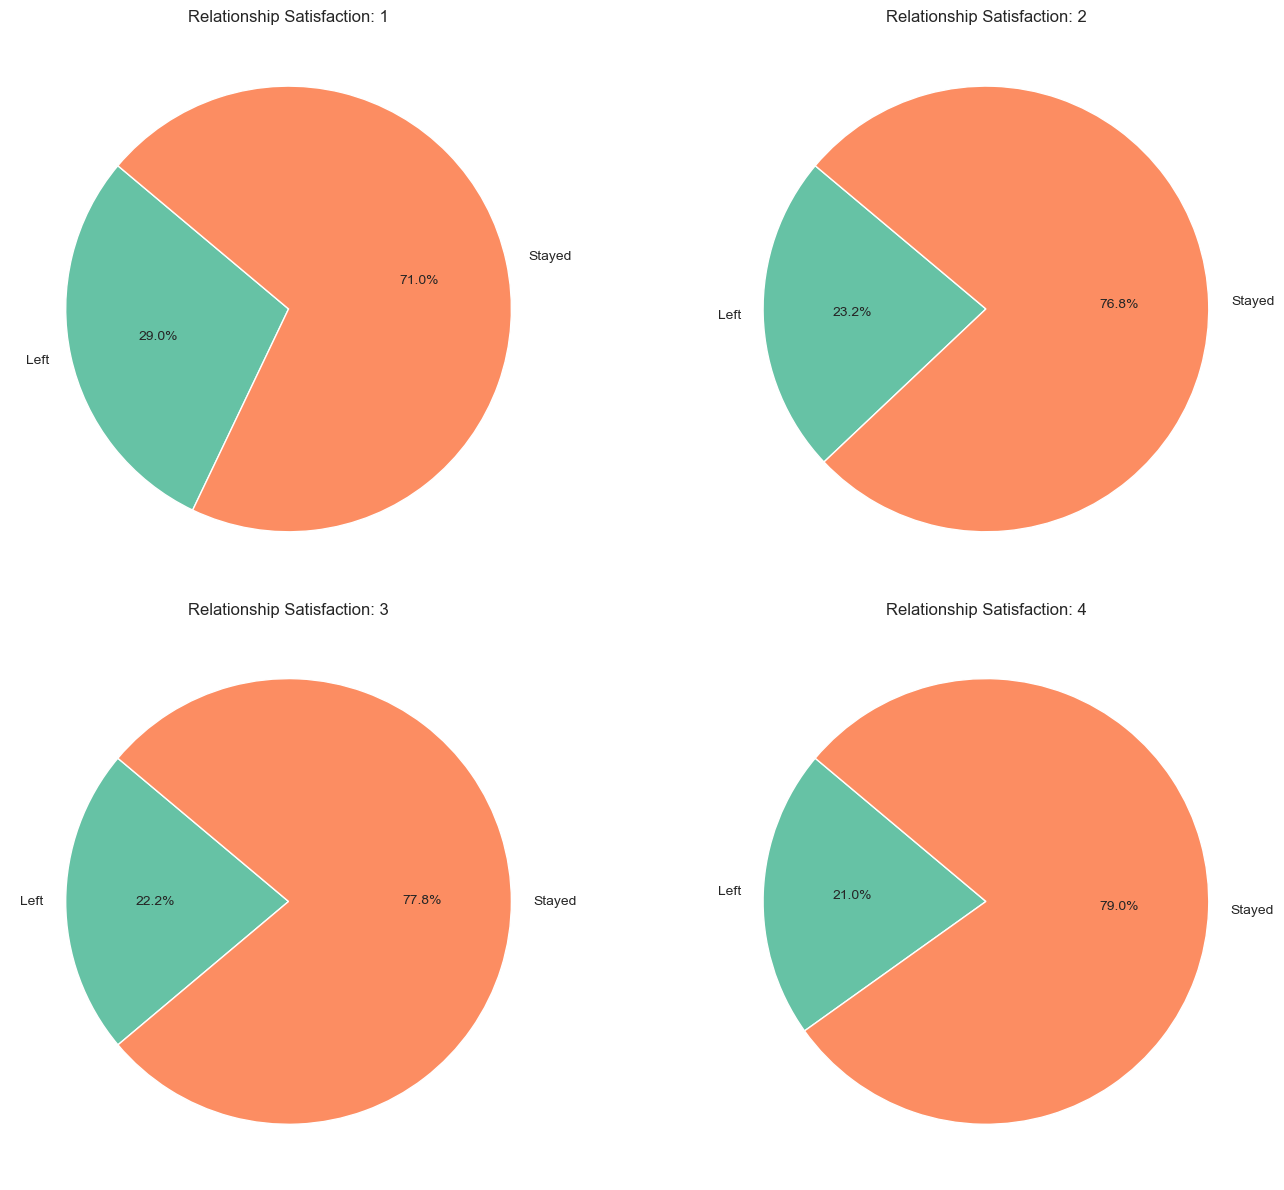

<Figure size 2000x500 with 0 Axes>

In [248]:
# Get unique values for Relationship Satisfaction
relsat_levels = empdata['RelationshipSatisfaction'].unique()

# Define custom colors
custom_colors = sns.color_palette("Set2", len(empdata['Attrition'].unique()))

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

# Create a pie chart for each level of Relationship Satisfaction
for i, level in enumerate(sorted(relsat_levels)):
    # Filter data
    filtered_data = empdata[empdata['RelationshipSatisfaction'] == level]
    
    # Compute job satisfaction counts
    att_counts = filtered_data['Attrition'].value_counts().sort_index()
    
    # Plot pie chart
    axs[i].pie(att_counts, 
               labels=att_counts.index, 
               autopct='%1.1f%%',
               colors=custom_colors, 
               startangle=140)
    axs[i].set_title(f'Relationship Satisfaction: {level}')

plt.tight_layout()
plt.show()

<b> * As employees form better relationships with colleagues, their likelihood of leaving decreases. Employees went from a 29% chance of leaving down to a 21% chance just from forming bonds with their coworkers. If managers form bonds with their employees and recognize their efforts, we should see a jump in employee retention.

<b>Retirement</b>

C:\Users\Admin\AppData\Local\Temp\ipykernel_3728\3620502571.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Admin\anaconda3\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Admin\anaconda3\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



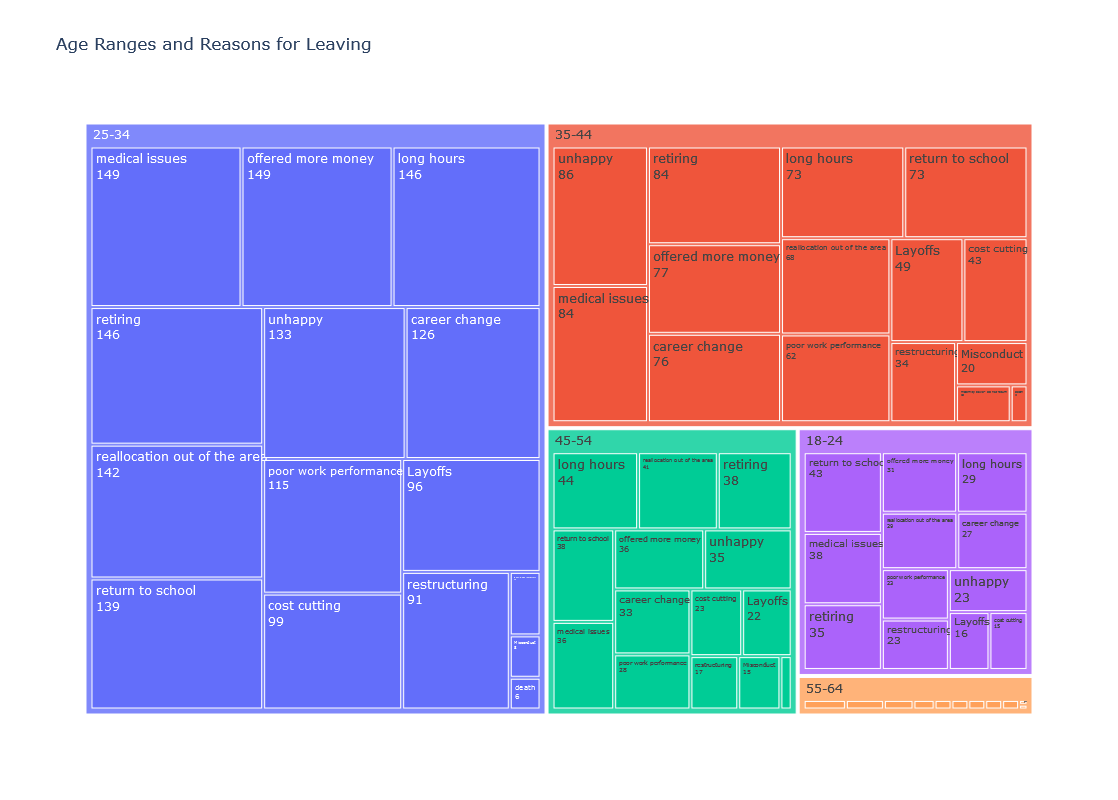

<Figure size 2000x500 with 0 Axes>

In [250]:
# Define age bins and labels
bins = [0, 24, 34, 44, 54, 64, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create age range column
empdata['AgeRange'] = pd.cut(empdata['Age'], bins=bins, labels=labels, right=False)

# Group by age range and reason for leaving, and count occurrences
filtered_att = empdata[empdata['Attrition'] == 'Left']
grouped_emp = filtered_att.groupby(['AgeRange', 'Reason']).size().reset_index(name='Count')
empdata = empdata.dropna(subset=['Age', 'Reason'])

import plotly.express as px

# Create the treemap
fig = px.treemap(
    grouped_emp, 
    path=['AgeRange', 'Reason'], 
    values='Count', 
    title='Age Ranges and Reasons for Leaving'
)
fig.update_layout(
    width=1000,   # Set the width of the treemap
    height=800,  # Set the height of the treemap
)
fig.update_traces(textinfo='label+value', textfont_size=12)
# Show the treemap
fig.show()

<b> - Employees between the ages of 25 and 34 are leaving the most. Many seem to be leaving due to medical reasons. Long hours and better offers from other companies are also high up on the list of reasons that employees are leaving.

<b>Insights</b>

<b>* Unfortunately, there isn't much to be done about retirement. However, better medical insurance for employees can increase attrition for those leaving due to medical issues. NovaCraft should also look into hiring more employees to cut down on some of the long hours employees are required to work. Work life balance is very important in the workplace. Employees that feel they have time outside of work for personal activities tend to be happier than those that don't. NovaCraft can also increase employee job satisfaction by acknowledging good work by their employees. When employees feel seen, they are much more likely to stay and work hard.